In [1]:

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, Aer, execute


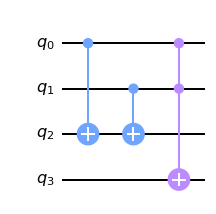

In [2]:

# Initialize adder (XOR, AND)
adder = QuantumCircuit(4)

# Create XOR gate
adder.cx(0, 2)
adder.cx(1, 2)

# Create AND gate
adder.ccx(0, 1, 3)

adder_gate = adder.to_gate()
adder.draw()


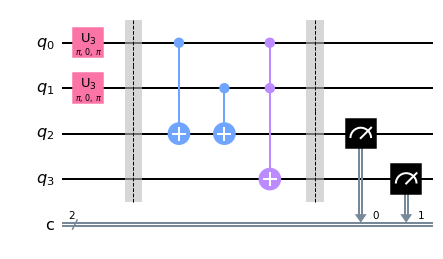

In [3]:

# Initialize circuit
circuit = QuantumCircuit(4, 2)

# Input bits
circuit.x(0)
circuit.x(1)
circuit.barrier()

# Apply adder
circuit.append(adder_gate, [0, 1, 2, 3])
circuit.barrier()

# Get the output
circuit.measure(2, 0)
circuit.measure(3, 1)

circuit.decompose().draw()


In [4]:

# Initialize a backend
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)

result = job.result()
counts = result.get_counts(circuit)
output = list(counts.keys())[0]
print("1 + 1 = " + output)


1 + 1 = 10
